In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
  warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv', sep='\t')

In [ ]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From info we can observe that:



*   Missing values in Income columns
*   Dt-Customer that shows date is ini object format.
*   There are categorical feature in dataframe, need to encode tu numeric format.



In [ ]:
#Remove missing values
data=data.dropna()
print("New number of rows:", len(data))

New number of rows: 2216


In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")

In [ ]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

We can see that column Dt_Customer already change to datetime.

In [ ]:
data["Customer_For"] = (data["Dt_Customer"].max()-data["Dt_Customer"]).dt.days

In [ ]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  Customer_For  
0         11         1           663  
1         11         0           113  
2         11         0           312  
3         11         0           139  
4         11         0           161  

[5 rows x 30 columns]

In [ ]:
print("Categories of Marital Status""\n", data["Marital_Status"].value_counts(), "\n")

Categories of Marital Status
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 



In [ ]:
print("Categories of Education""\n", data["Education"].value_counts(), "\n")

Categories of Education
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64 



Feature Engineering

In [ ]:
#Age of Customer
data["Age"] = 2025 - data["Year_Birth"]

In [ ]:
# Total spending
data["Total_Spending"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

In [ ]:
#Deriving living situation by marital status "Alone"
data["Living_with"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

In [ ]:
#Total Children
data["Children"]=data["Kidhome"]+data["Teenhome"]

In [ ]:
# Household member
data["Household_Size"]=data["Living_with"].replace({"Alone":1, "Partner":2})+data["Children"]

<ipython-input-56-e935ad2d7c6a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Household_Size"]=data["Living_with"].replace({"Alone":1, "Partner":2})+data["Children"]


In [ ]:
#pertaining parenthood
data["Is_Parent"]=np.where(data["Children"]>0, 1, 0)

In [ ]:
#segmenting education level in thre groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [ ]:
#for clarity
data=data.rename(columns={"MntWines":"Wine", "MntFruits":"Fruits", "MntMeatProducts":"Meat", "MntFishProducts":"Fish", "MntSweetProducts":"Sweets", "MntGoldProds":"Gold"})

In [ ]:
#drop redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)
data.head()

Education   Income  Kidhome  Teenhome  Recency  Wine  Fruits  Meat  \
0      Graduate  58138.0        0         0       58   635      88   546   
1      Graduate  46344.0        1         1       38    11       1     6   
2      Graduate  71613.0        0         0       26   426      49   127   
3      Graduate  26646.0        1         0       26    11       4    20   
4  Postgraduate  58293.0        1         0       94   173      43   118   

   Fish  Sweets  ...  AcceptedCmp2  Complain  Response  Customer_For  Age  \
0   172      88  ...             0         0         1           663   68   
1     2       1  ...             0         0         0           113   71   
2   111      21  ...             0         0         0           312   60   
3    10       3  ...             0         0         0           139   41   
4    46      27  ...             0         0         0           161   44   

   Total_Spending  Living_with  Children  Household_Size  Is_Parent  
0            1617        Alone         0               1          0  
1              27        Alone         2               3          1  
2             776      Partner         0               2          0  
3              53      Partner         1               3          1  
4             422      Partner         1               3          1  

[5 rows x 30 columns]

In [ ]:
data.describe()

Income      Kidhome     Teenhome      Recency         Wine  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000   2216.000000   
mean       0.064079      0.013538     0.009477     0.150271    353.521209   
std        0.244950      0.115588     0.096907     0.357417    202.434667   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     0.000000     0.000000    180.000000   
50%        0.000000      0.000000     0.000000     0.000000    355.500000   
75%        0.000000      0.000000     0.000000     0.000000    529.000000   
max        1.000000      1.000000     1.000000     1.000000    699.000000   

               Age  Total_Spending     Children  Household_Size    Is_Parent  
count  2216.000000     2216.000000  2216.000000     2216.000000  2216.000000  
mean     56.179603      607.075361     0.947202        2.592509     0.714350  
std      11.985554      602.900476     0.749062        0.905722     0.451825  
min      29.000000        5.000000     0.000000        1.000000     0.000000  
25%      48.000000       69.000000     0.000000        2.000000     0.000000  
50%      55.000000      396.500000     1.000000        3.000000     1.000000  
75%      66.000000     1048.000000     1.000000        3.000000     1.000000  
max     132.000000     2525.000000     3.000000        5.000000     1.000000  

[8 rows x 28 columns]

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

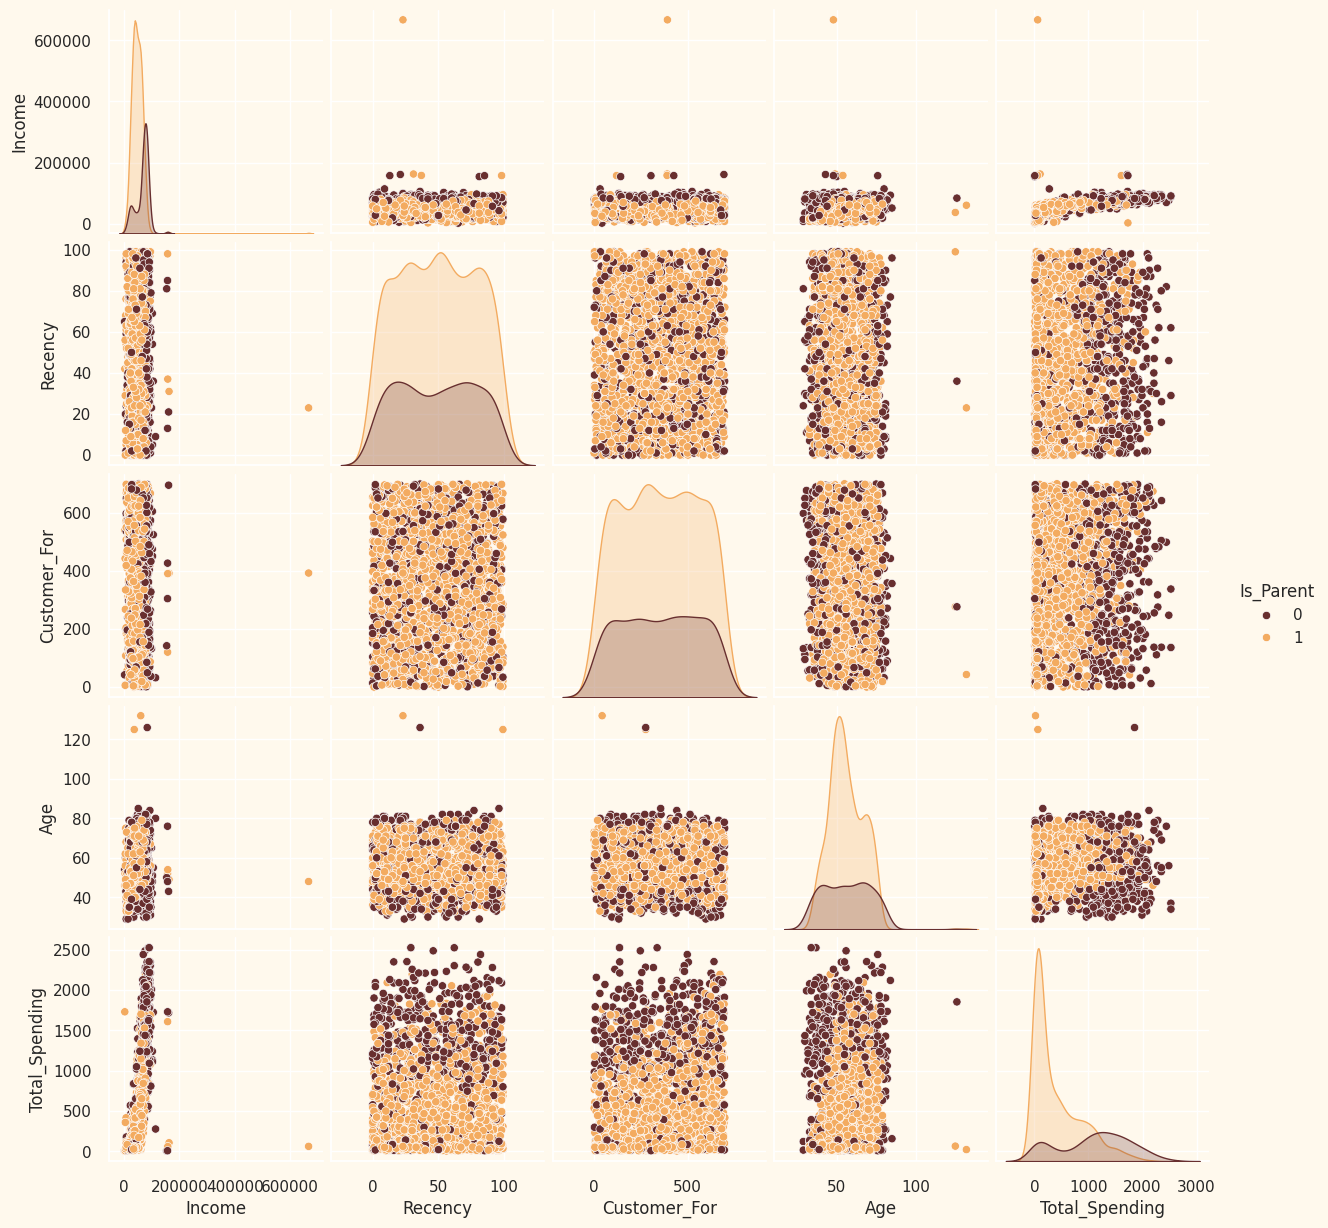

In [ ]:
#To plot some selected features
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Total_Spending", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.show()

We able to find some outliers from the feature

In [ ]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("Data after remove outliers:", len(data))

Data after remove outliers: 2212


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

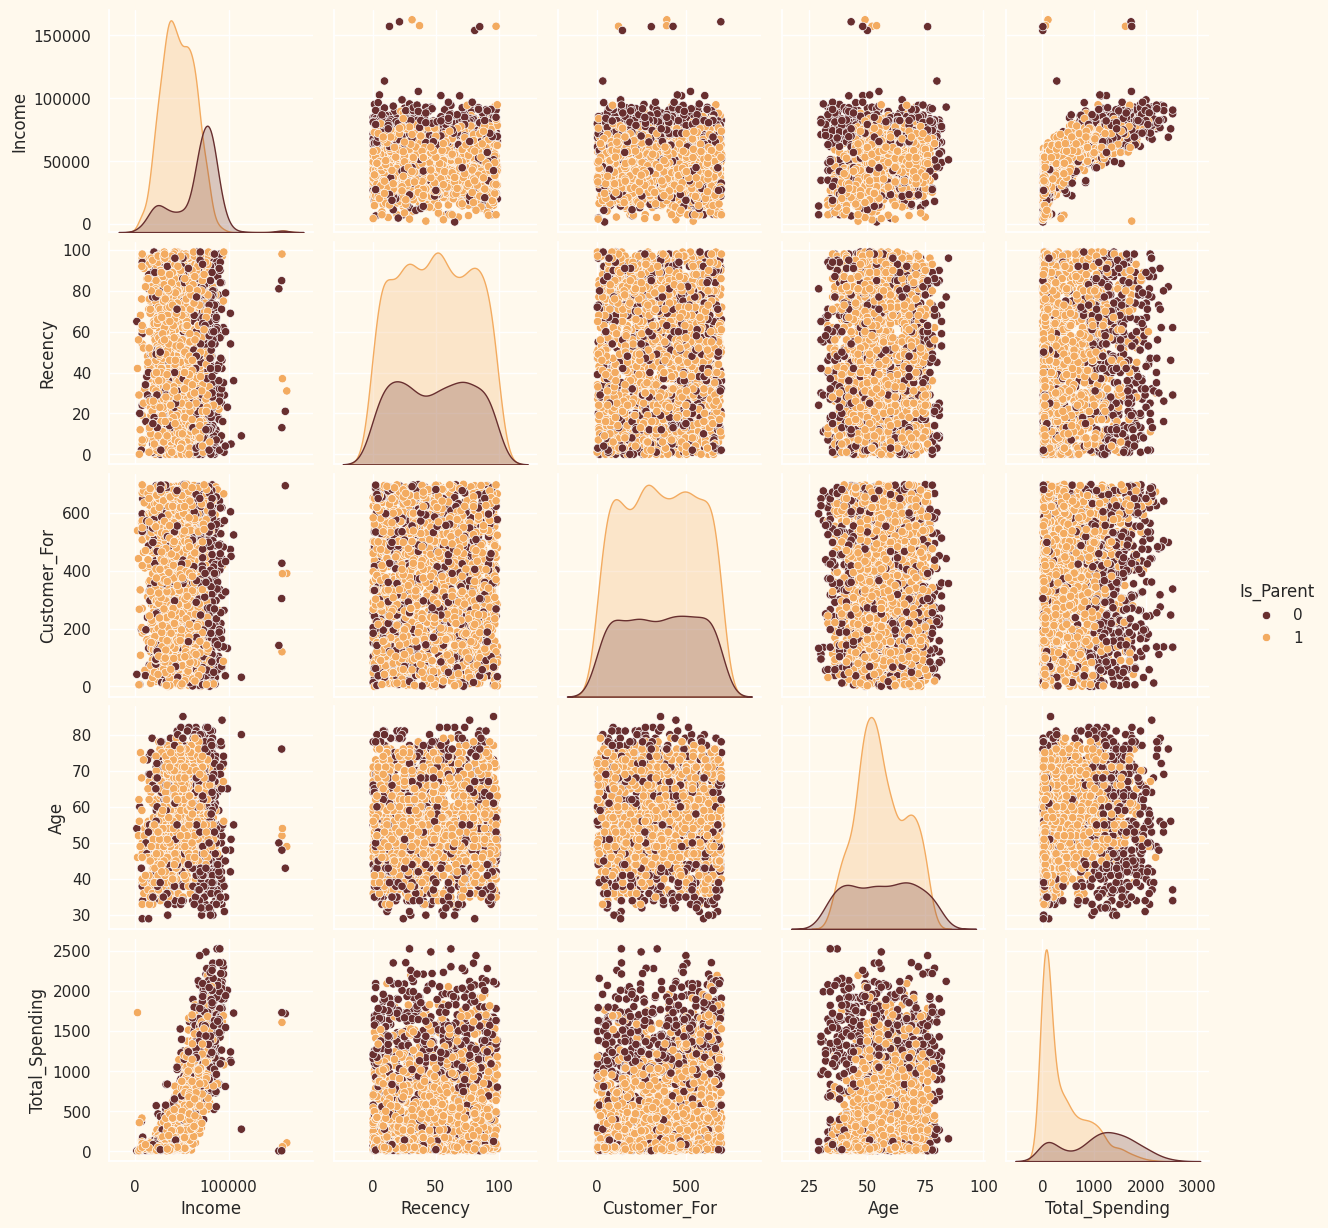

In [ ]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Total_Spending", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.show()

Extreme outliers have been removed

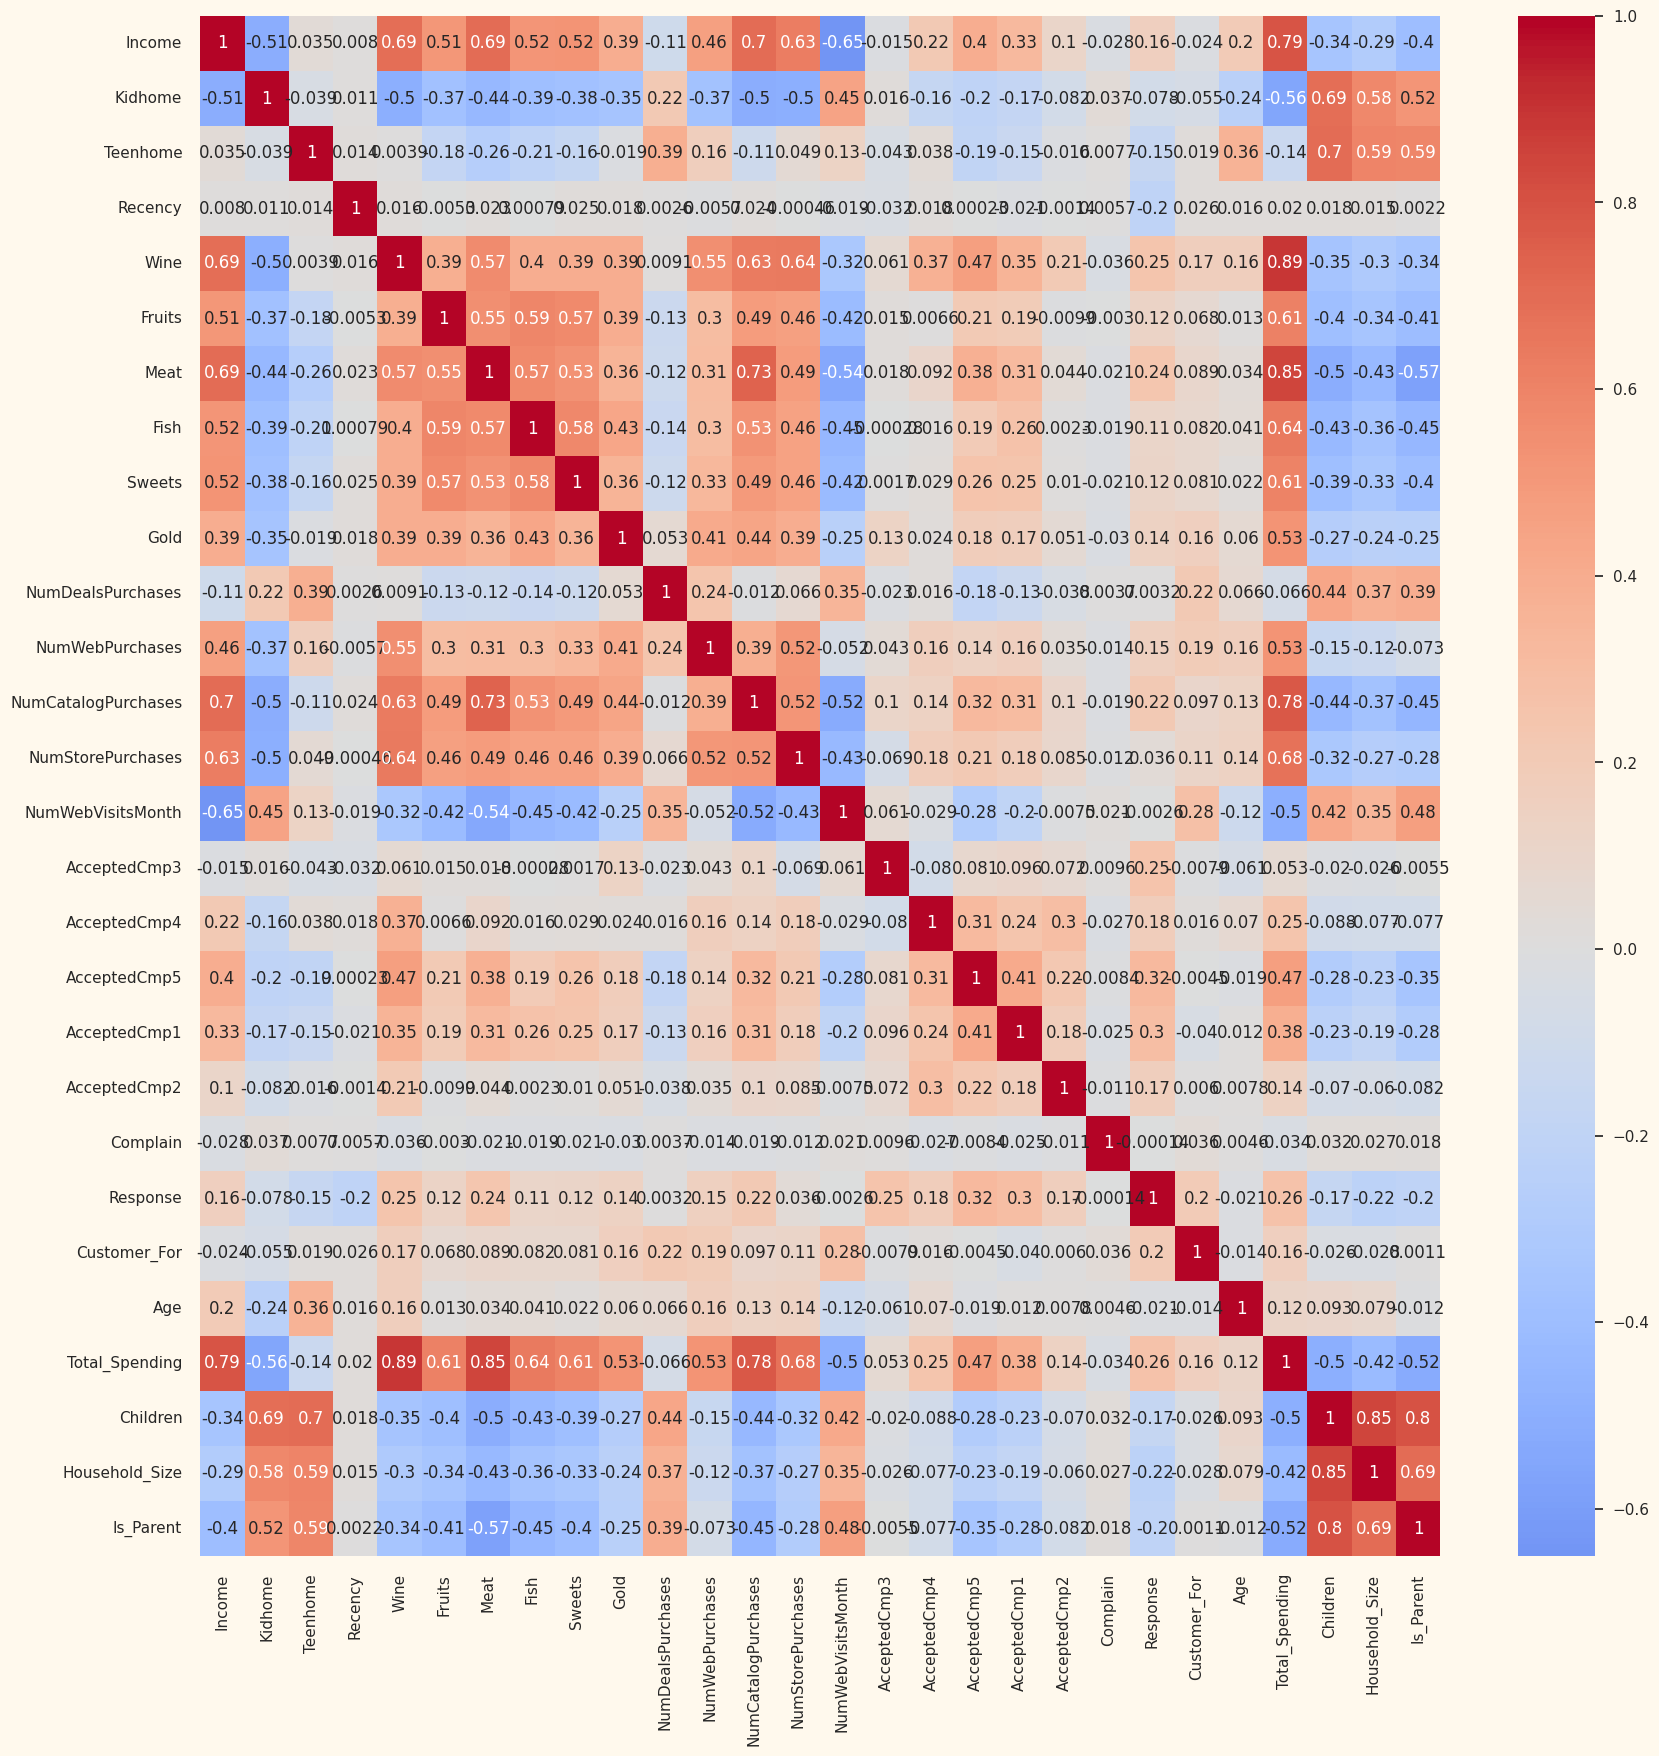

In [ ]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])

# Calculate correlation matrix
corrmat = numerical_data.corr()

# Create heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', center=0)
plt.show()

We will preprocess the data

In [ ]:
#Get list of categorical variables
obeject_columns = data.select_dtypes(include=['object']).columns.tolist()
print(obeject_columns)


['Education', 'Living_with']


In [ ]:
LE = LabelEncoder()
data[obeject_columns] = data[obeject_columns].apply(LE.fit_transform)
print("All features are now numerical")

All features are now numerical


In [ ]:
data.head()

Education   Income  Kidhome  Teenhome  Recency  Wine  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58   635      88   546   172   
1          0  46344.0        1         1       38    11       1     6     2   
2          0  71613.0        0         0       26   426      49   127   111   
3          0  26646.0        1         0       26    11       4    20    10   
4          1  58293.0        1         0       94   173      43   118    46   

   Sweets  ...  AcceptedCmp2  Complain  Response  Customer_For  Age  \
0      88  ...             0         0         1           663   68   
1       1  ...             0         0         0           113   71   
2      21  ...             0         0         0           312   60   
3       3  ...             0         0         0           139   41   
4      27  ...             0         0         0           161   44   

   Total_Spending  Living_with  Children  Household_Size  Is_Parent  
0            1617            0         0               1          0  
1              27            0         2               3          1  
2             776            1         0               2          0  
3              53            1         1               3          1  
4             422            1         1               3          1  

[5 rows x 30 columns]

In [ ]:
ds = data.copy()

cols_to_drop = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']
ds = ds.drop(cols_to_drop, axis=1)

In [ ]:
scaler = StandardScaler()
ds_scaled = scaler.fit_transform(ds)
ds_scaled_df = pd.DataFrame(ds_scaled, columns=ds.columns)

# Optional: Display the resulting DataFrame
print(ds_scaled_df.head())

   Education    Income   Kidhome  Teenhome   Recency      Wine    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age  Total_Spending  

Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
# Assuming ds_scaled is your scaled data
pca = PCA()
pca.fit(ds_scaled_df)
# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)
# Find number of components for 90% variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Components explaining 90% variance: {n_components}")

[0.36011321 0.48711165 0.5530406  0.61025046 0.65815522 0.70186034
 0.74321393 0.77965241 0.81292328 0.84096401 0.86720754 0.89124526
 0.91077189 0.92921633 0.94624972 0.96131608 0.97338383 0.98377812
 0.99245386 1.         1.         1.         1.        ]
Components explaining 90% variance: 13


Components explaining 90% variance: 13


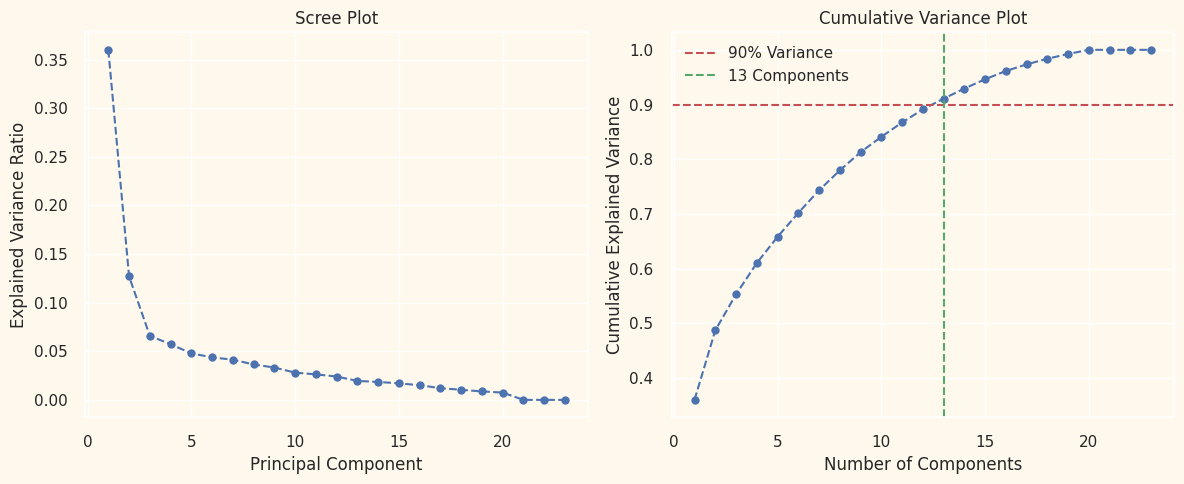

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming ds_scaled_df is your scaled DataFrame
pca = PCA()
pca.fit(ds_scaled_df)

# Explained variance ratio (for scree plot)
explained_variance_ratio = pca.explained_variance_ratio_
# Cumulative explained variance (from your code)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find number of components for 90% variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Components explaining 90% variance: {n_components}")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Scree Plot
ax1.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot')
ax1.grid(True)

# Cumulative Variance Plot
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
ax2.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
ax2.axvline(x=n_components, color='g', linestyle='--', label=f'{n_components} Components')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Variance Plot')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

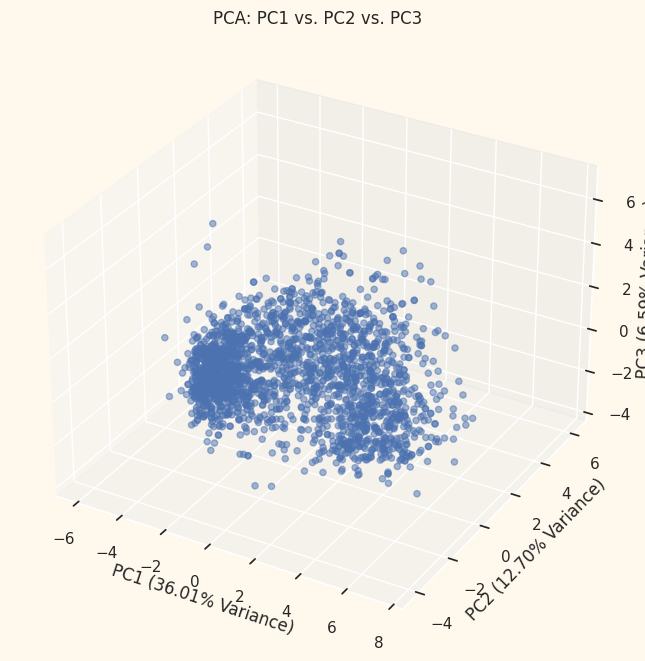

Total variance explained by 3 components: 55.30%


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.decomposition import PCA

# Apply PCA with 3 components for visualization
pca = PCA(n_components=3)
PCA_ds = pca.fit_transform(ds_scaled_df)

# Convert to DataFrame
PCA_ds_df = pd.DataFrame(PCA_ds, columns=['PC1', 'PC2', 'PC3'])

# Calculate explained variance for labeling
explained_variance_ratio = pca.explained_variance_ratio_
pc1_variance = explained_variance_ratio[0] * 100
pc2_variance = explained_variance_ratio[1] * 100
pc3_variance = explained_variance_ratio[2] * 100

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_ds_df['PC1'], PCA_ds_df['PC2'], PCA_ds_df['PC3'], alpha=0.5)
ax.set_xlabel(f'PC1 ({pc1_variance:.2f}% Variance)')
ax.set_ylabel(f'PC2 ({pc2_variance:.2f}% Variance)')
ax.set_zlabel(f'PC3 ({pc3_variance:.2f}% Variance)')
ax.set_title('PCA: PC1 vs. PC2 vs. PC3')
plt.show()

# Print total variance explained by 3 components
print(f"Total variance explained by 3 components: {sum(explained_variance_ratio):.2%}")

Elbow Method to determine the number of clusters to be formed:


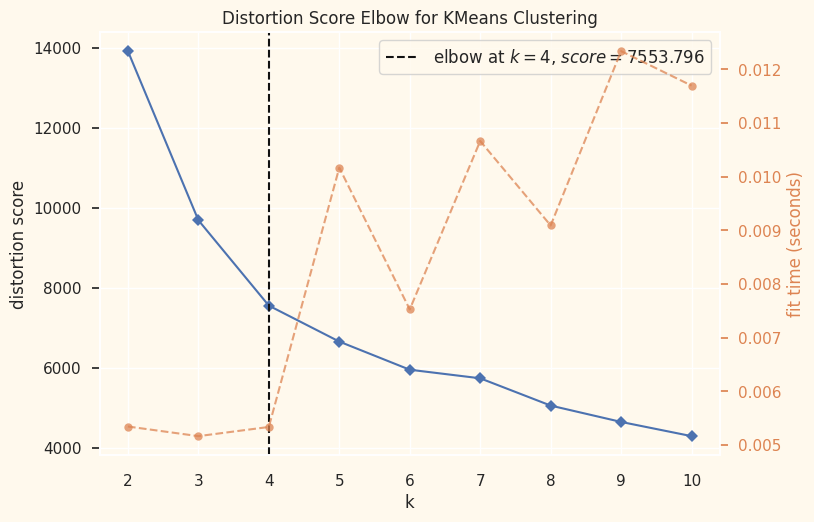

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

We get the optimal number of cluster is = 4

In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds_df)
PCA_ds_df["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

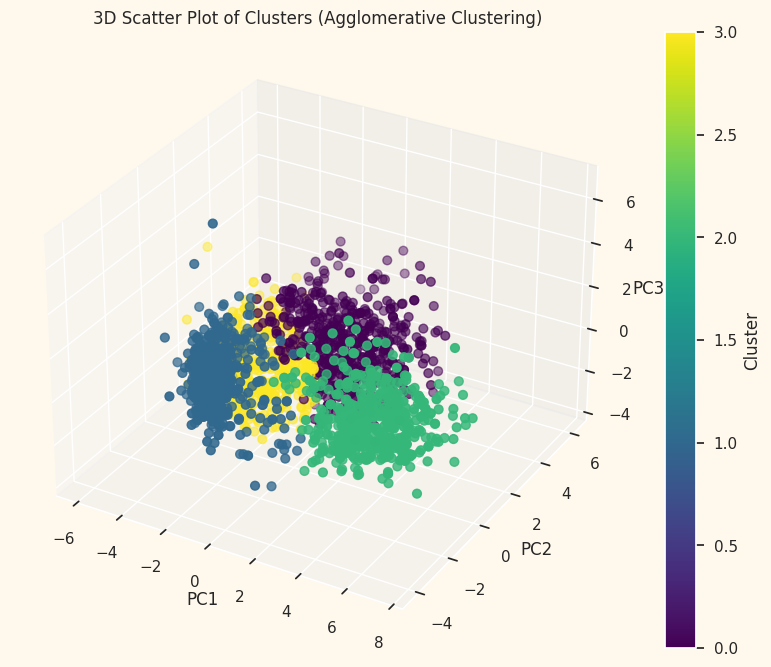

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# Fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds_df)
# Add Clusters to PCA DataFrame
PCA_ds_df["Clusters"] = yhat_AC
# Add Clusters to original DataFrame
data["Clusters"] = yhat_AC

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    PCA_ds_df['PC1'],
    PCA_ds_df['PC2'],
    PCA_ds_df['PC3'],
    s=40,
    c=PCA_ds_df["Clusters"],
    marker='o',
    cmap='viridis'  # Specify colormap
)
plt.colorbar(scatter, label='Cluster')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of Clusters (Agglomerative Clustering)')
plt.show()

<ipython-input-83-2f63248a592e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"], palette= pal)


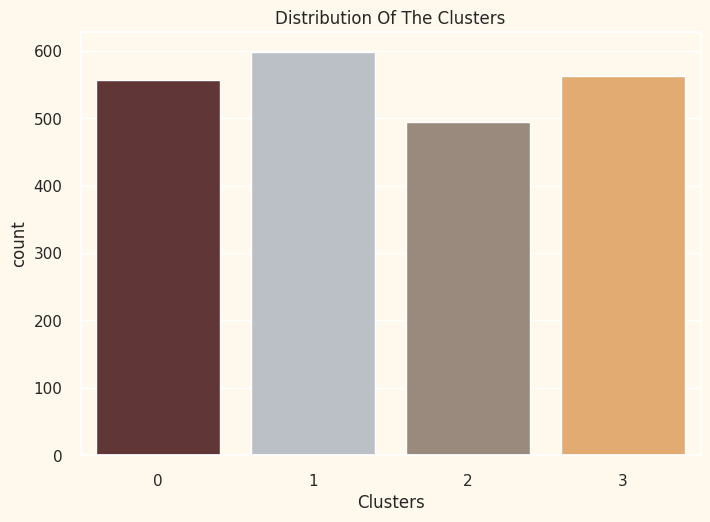

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

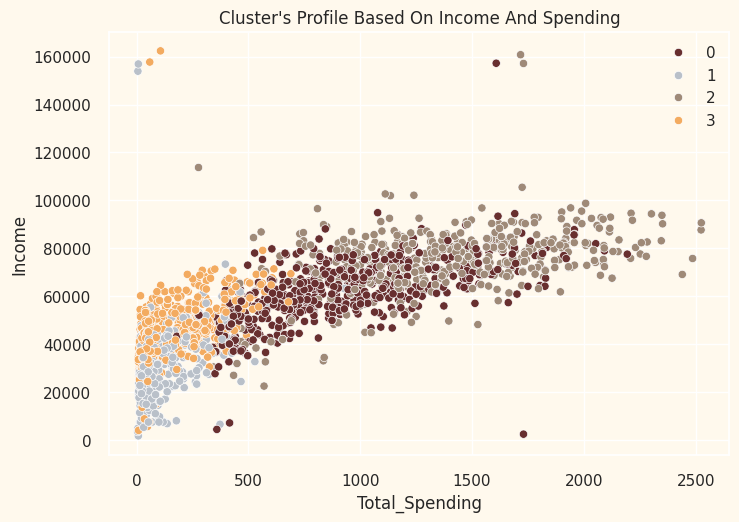

In [ ]:
pl = sns.scatterplot(data = data,x=data["Total_Spending"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Income vs spending plot shows the clusters pattern



*   Group 0 : high spending & average income
*   Group 1 : low spending & low income
*   Group 2 : high spending & high income
*   Group 3 : high spending & low income



/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-87-2aabc1d86ab1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(x=data["Clusters"], y=data["Total_Spending"], palette=pal)
/usr/local/lib/python3.11/dist-packages/s

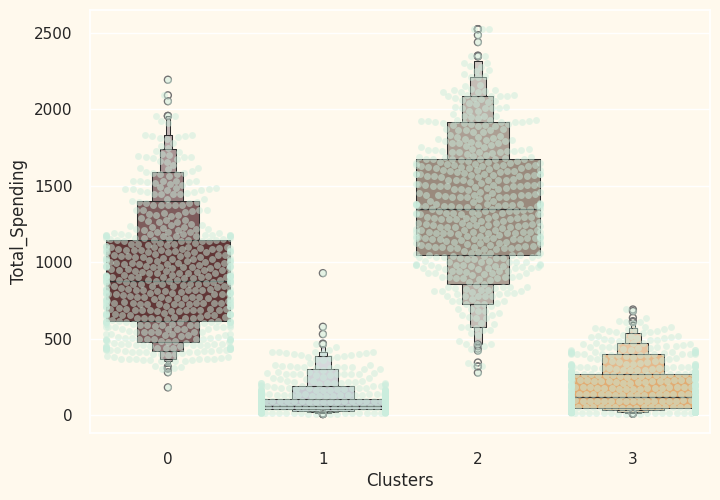

In [ ]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Total_Spending"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Total_Spending"], palette=pal)
plt.show()

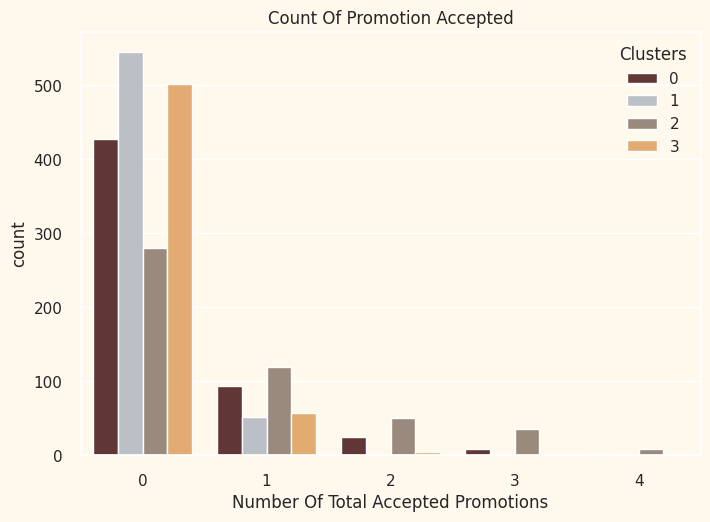

In [ ]:
#Creating a feature to get a sum of accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

<ipython-input-89-0ef84d1c8fe9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)


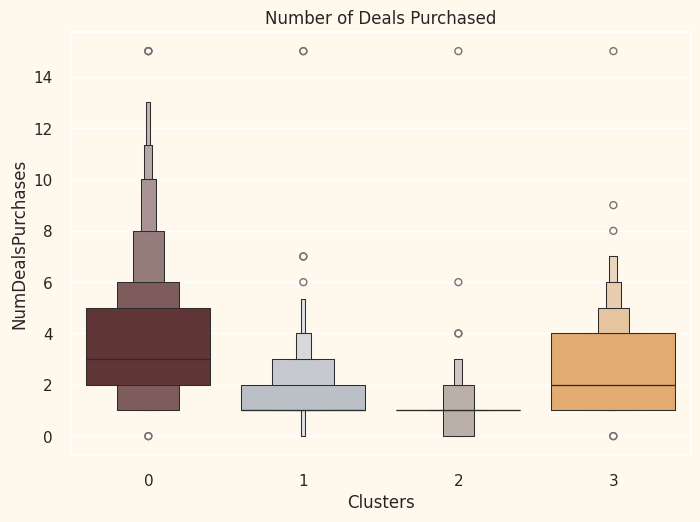

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()